# Where do the water masses go in the Salish Sea?
Using the same water mass seperations as in CIOPS

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import datetime as dt

In [2]:
def get_data(mydata, starttime, endtime):
    salt = mydata.init_salt[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    temp = mydata.init_t[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    depth = depthf(mydata.init_z[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)[0]
    section = mydata.final_section[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    trans = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/(endtime-starttime+1)
    return salt, temp, depth, section, trans

In [3]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)

In [4]:
# section numbers
meander = 0
admiralty = 2
deception = 3
rosario = 4
sanjuan = 5
haro = 6
sec_name = ['meander', 'admiralty', 'deception', 'rosario', 'sanjuan', 'haro']

## summer 2017

In [5]:
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
sum_start = 1+(5*720+(sum(yearjumps[:5+1]*24)))
sum_end = 720+(8*720+(sum(yearjumps[:8+1]*24)))

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt, temp, depth, section, trans = get_data(mydata, sum_start, sum_end)

In [6]:
d = {'salt': salt, 'temp': temp, 'depth':depth, 'section':section, 'transport':trans}
df = pd.DataFrame(data=d)

In [7]:
upwelled = df[(df.depth <= 200) & (df.salt >= 32)]
cuc = df[(df.depth > 200) & (df.salt >= 32)]
columbia = df[(df.salt < 32)]

In [8]:
[np.sum(upwelled.transport)/np.sum(df.transport)*100,np.sum(cuc.transport)/np.sum(df.transport)*100,
np.sum(columbia.transport)/np.sum(df.transport)*100]

[82.48644651961337, 6.267863370364149, 11.245690110022469]

In [9]:
# lets see what sections these groups get into 
# first upwelled
print('advects back out = ' + str(sum(upwelled.transport[upwelled.section == meander])/np.sum(upwelled.transport)*100))
print('haro = ' + str(sum(upwelled.transport[upwelled.section == haro])/np.sum(upwelled.transport)*100))
print('sanjuan = ' + str(sum(upwelled.transport[upwelled.section == sanjuan])/np.sum(upwelled.transport)*100))
print('rosario = ' + str(sum(upwelled.transport[upwelled.section == rosario])/np.sum(upwelled.transport)*100))
print('admiralty = ' + str(sum(upwelled.transport[upwelled.section == admiralty])/np.sum(upwelled.transport)*100))
print('deception = ' + str(sum(upwelled.transport[upwelled.section == deception])/np.sum(upwelled.transport)*100))

advects back out = 78.86193130464324
haro = 15.036141234040171
sanjuan = 0.8025543181691127
rosario = 1.6676706078259846
admiralty = 3.61407399127876
deception = 0.017539038600961242


In [10]:
# and deep
print('advects back out = ' + str(sum(cuc.transport[cuc.section == meander])/np.sum(cuc.transport)*100))
print('haro = ' + str(sum(cuc.transport[cuc.section == haro])/np.sum(cuc.transport)*100))
print('sanjuan = ' + str(sum(cuc.transport[cuc.section == sanjuan])/np.sum(cuc.transport)*100))
print('rosario = ' + str(sum(cuc.transport[cuc.section == rosario])/np.sum(cuc.transport)*100))
print('admiralty = ' + str(sum(cuc.transport[cuc.section == admiralty])/np.sum(cuc.transport)*100))
print('deception = ' + str(sum(cuc.transport[cuc.section == deception])/np.sum(cuc.transport)*100))

advects back out = 88.46222790645251
haro = 8.610096977372251
sanjuan = 0.4545295871380527
rosario = 0.8177067747539721
admiralty = 1.6480737956203904
deception = 0.007364958662847872


In [11]:
# columbia 
print('advects back out = ' + str(sum(columbia.transport[columbia.section == meander])/np.sum(columbia.transport)*100))
print('haro = ' + str(sum(columbia.transport[columbia.section == haro])/np.sum(columbia.transport)*100))
print('sanjuan = ' + str(sum(columbia.transport[columbia.section == sanjuan])/np.sum(columbia.transport)*100))
print('rosario = ' + str(sum(columbia.transport[columbia.section == rosario])/np.sum(columbia.transport)*100))
print('admiralty = ' + str(sum(columbia.transport[columbia.section == admiralty])/np.sum(columbia.transport)*100))
print('deception = ' + str(sum(columbia.transport[columbia.section == deception])/np.sum(columbia.transport)*100))

advects back out = 99.92800893015723
haro = 0.043914367160181295
sanjuan = 0.0019204581578246885
rosario = 0.0067040129977496985
admiralty = 0.01945223152815096
deception = 0.0


## Winter 2016/17

In [12]:
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
win_start = 1+(9*720+(sum(yearjumps[:9+1]*24)))
win_end = 720+(11*720+(sum(yearjumps[:11+1]*24)))

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan16/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltW, tempW, depthW, sectionW, transW = get_data(mydata, win_start, win_end)

win_start = 1+(0*720+(sum(yearjumps[:0+1]*24)))
win_end = 720+(5*720+(sum(yearjumps[:5+1]*24)))

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltS, tempS, depthS, sectionS, transS = get_data(mydata, win_start, win_end)

salt = np.append(saltW, saltS)
temp = np.append(tempW, tempS)
depth = np.append(depthW, depthS)
section = np.append(sectionW, sectionS)
trans = np.append(transW, transS)

In [13]:
d = {'salt': salt, 'temp': temp, 'depth':depth, 'section':section, 'transport':trans}
df = pd.DataFrame(data=d)

In [14]:
upwelled = df[(df.depth <= 200) & (df.salt >= 32)]
cuc = df[(df.depth > 200) & (df.salt >= 32)]
columbia = df[(df.salt < 32)]

In [15]:
[np.sum(upwelled.transport)/np.sum(df.transport)*100,np.sum(cuc.transport)/np.sum(df.transport)*100,
np.sum(columbia.transport)/np.sum(df.transport)*100]

[63.403783973964146, 6.166366356170525, 30.429849669865423]

In [16]:
# lets see what sections these groups get into 
# first upwelled
print('advects back out = ' + str(sum(upwelled.transport[upwelled.section == meander])/np.sum(upwelled.transport)*100))
print('haro = ' + str(sum(upwelled.transport[upwelled.section == haro])/np.sum(upwelled.transport)*100))
print('sanjuan = ' + str(sum(upwelled.transport[upwelled.section == sanjuan])/np.sum(upwelled.transport)*100))
print('rosario = ' + str(sum(upwelled.transport[upwelled.section == rosario])/np.sum(upwelled.transport)*100))
print('admiralty = ' + str(sum(upwelled.transport[upwelled.section == admiralty])/np.sum(upwelled.transport)*100))
print('deception = ' + str(sum(upwelled.transport[upwelled.section == deception])/np.sum(upwelled.transport)*100))

advects back out = 86.20518281324941
haro = 9.097603288118055
sanjuan = 0.53019990239909
rosario = 0.9464089207634625
admiralty = 3.0111675182564492
deception = 0.010073688376884028


In [17]:
# and deep
print('advects back out = ' + str(sum(cuc.transport[cuc.section == meander])/np.sum(cuc.transport)*100))
print('haro = ' + str(sum(cuc.transport[cuc.section == haro])/np.sum(cuc.transport)*100))
print('sanjuan = ' + str(sum(cuc.transport[cuc.section == sanjuan])/np.sum(cuc.transport)*100))
print('rosario = ' + str(sum(cuc.transport[cuc.section == rosario])/np.sum(cuc.transport)*100))
print('admiralty = ' + str(sum(cuc.transport[cuc.section == admiralty])/np.sum(cuc.transport)*100))
print('deception = ' + str(sum(cuc.transport[cuc.section == deception])/np.sum(cuc.transport)*100))

advects back out = 93.48854029970028
haro = 4.305421294243852
sanjuan = 0.260153862976561
rosario = 0.4206077366042773
admiralty = 1.3420340829031492
deception = 0.0028524863047357826


In [18]:
# columbia 
print('advects back out = ' + str(sum(columbia.transport[columbia.section == meander])/np.sum(columbia.transport)*100))
print('haro = ' + str(sum(columbia.transport[columbia.section == haro])/np.sum(columbia.transport)*100))
print('sanjuan = ' + str(sum(columbia.transport[columbia.section == sanjuan])/np.sum(columbia.transport)*100))
print('rosario = ' + str(sum(columbia.transport[columbia.section == rosario])/np.sum(columbia.transport)*100))
print('admiralty = ' + str(sum(columbia.transport[columbia.section == admiralty])/np.sum(columbia.transport)*100))
print('deception = ' + str(sum(columbia.transport[columbia.section == deception])/np.sum(columbia.transport)*100))

advects back out = 97.85569637029515
haro = 1.1634320828212685
sanjuan = 0.09707726678581699
rosario = 0.14877661649244175
admiralty = 0.7172346426113841
deception = 0.0017962889823965333


## Winter 2017/18

In [19]:
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
win_start = 1+(9*720+(sum(yearjumps[:9+1]*24)))
win_end = 720+(11*720+(sum(yearjumps[:11+1]*24)))

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt17, temp17, depth17, section17, trans17 = get_data(mydata, win_start, win_end)

start = 1
end = 720

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01jan18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt_jan, temp_jan, depth_jan, section_jan, trans_jan = get_data(mydata, start, end)

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01feb18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt_feb, temp_feb, depth_feb, section_feb, trans_feb = get_data(mydata, start, end)

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01mar18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt_mar, temp_mar, depth_mar, section_mar, trans_mar = get_data(mydata, start, end)

salt = np.append(np.append(np.append(salt17, salt_jan), salt_feb), salt_mar)
temp = np.append(np.append(np.append(temp17, temp_jan), temp_feb), temp_mar)
depth = np.append(np.append(np.append(depth17, depth_jan), depth_feb), depth_mar)
section = np.append(np.append(np.append(section17, section_jan), section_feb), section_mar)
trans = np.append(np.append(np.append(trans17, trans_jan), trans_feb), trans_mar)

In [20]:
d = {'salt': salt, 'temp': temp, 'depth':depth, 'section':section, 'transport':trans}
df = pd.DataFrame(data=d)

In [21]:
upwelled = df[(df.depth <= 200) & (df.salt >= 32)]
cuc = df[(df.depth > 200) & (df.salt >= 32)]
columbia = df[(df.salt < 32)]

In [22]:
[np.sum(upwelled.transport)/np.sum(df.transport)*100,np.sum(cuc.transport)/np.sum(df.transport)*100,
np.sum(columbia.transport)/np.sum(df.transport)*100]

[64.51913894995195, 6.095397136901457, 29.38546391314661]

In [23]:
# lets see what sections these groups get into 
# first upwelled
print('advects back out = ' + str(sum(upwelled.transport[upwelled.section == meander])/np.sum(upwelled.transport)*100))
print('haro = ' + str(sum(upwelled.transport[upwelled.section == haro])/np.sum(upwelled.transport)*100))
print('sanjuan = ' + str(sum(upwelled.transport[upwelled.section == sanjuan])/np.sum(upwelled.transport)*100))
print('rosario = ' + str(sum(upwelled.transport[upwelled.section == rosario])/np.sum(upwelled.transport)*100))
print('admiralty = ' + str(sum(upwelled.transport[upwelled.section == admiralty])/np.sum(upwelled.transport)*100))
print('deception = ' + str(sum(upwelled.transport[upwelled.section == deception])/np.sum(upwelled.transport)*100))

advects back out = 85.9074923365857
haro = 8.602617816895028
sanjuan = 0.5376347724680806
rosario = 0.8684338590656555
admiralty = 2.9866354265755346
deception = 0.010135156206366625


In [24]:
# and deep
print('advects back out = ' + str(sum(cuc.transport[cuc.section == meander])/np.sum(cuc.transport)*100))
print('haro = ' + str(sum(cuc.transport[cuc.section == haro])/np.sum(cuc.transport)*100))
print('sanjuan = ' + str(sum(cuc.transport[cuc.section == sanjuan])/np.sum(cuc.transport)*100))
print('rosario = ' + str(sum(cuc.transport[cuc.section == rosario])/np.sum(cuc.transport)*100))
print('admiralty = ' + str(sum(cuc.transport[cuc.section == admiralty])/np.sum(cuc.transport)*100))
print('deception = ' + str(sum(cuc.transport[cuc.section == deception])/np.sum(cuc.transport)*100))

advects back out = 92.6043680365625
haro = 4.5736470339224535
sanjuan = 0.2979765798597585
rosario = 0.47534916550493256
admiralty = 1.3799345621068348
deception = 0.0064622023368504766


In [53]:
100 - 85.9

14.099999999999994

In [25]:
# columbia 
print('advects back out = ' + str(sum(columbia.transport[columbia.section == meander])/np.sum(columbia.transport)*100))
print('haro = ' + str(sum(columbia.transport[columbia.section == haro])/np.sum(columbia.transport)*100))
print('sanjuan = ' + str(sum(columbia.transport[columbia.section == sanjuan])/np.sum(columbia.transport)*100))
print('rosario = ' + str(sum(columbia.transport[columbia.section == rosario])/np.sum(columbia.transport)*100))
print('admiralty = ' + str(sum(columbia.transport[columbia.section == admiralty])/np.sum(columbia.transport)*100))
print('deception = ' + str(sum(columbia.transport[columbia.section == deception])/np.sum(columbia.transport)*100))

advects back out = 97.5227071696774
haro = 1.1339700976419966
sanjuan = 0.08780541379432083
rosario = 0.16373876709214663
admiralty = 0.9096707882284927
deception = 0.0033608758785290643


# plots of water mass f to straits or meander?

In [6]:
starttime = 1
endtime = 720
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]

freshSOG = np.array([])
freshOUT = np.array([])
freshPS = np.array([])
    
cucSOG = np.array([])
cucOUT = np.array([])
cucPS = np.array([])
    
upSOG = np.array([])
upOUT = np.array([])
upPS = np.array([])
k = np.array([])

#216 and 2017
year = [16,17]

for num in year:
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan'+str(num)+'/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    for i in range(12):
        start, end = starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24)))
        XfreshSOG = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt < 32) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XfreshPS = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt < 32) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XfreshOUT = np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt < 32) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720

        XcucSOG = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XcucPS = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XcucOUT = np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720

        XupSOG = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XupPS = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XupOUT = np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
            
        freshSOG = np.append(freshSOG, XfreshSOG)
        freshOUT = np.append(freshOUT, XfreshOUT)
        freshPS = np.append(freshPS, XfreshPS)

        cucSOG = np.append(cucSOG, XcucSOG)
        cucOUT = np.append(cucOUT, XcucOUT)
        cucPS = np.append(cucPS, XcucPS)

        upSOG = np.append(upSOG, XupSOG)
        upOUT = np.append(upOUT, XupOUT)
        upPS = np.append(upPS, XupPS)
            
        k = np.append(k,i)

#2019 and 2018 (both done month by month)
year = [18,19]
str_mo = ['jan', 'feb', 'mar', 'apr', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for num in year:
    for i in range(len(str_mo)):
        file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01'+str_mo[i]+str(num)+'/ariane_positions_quantitative.nc'
        mydata = xr.open_dataset(file)
        time = mydata.init_t[-1]

        start, end = 1, 720
        XfreshSOG = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt < 32) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XfreshPS = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt < 32) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XfreshOUT = np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt < 32) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720

        XcucSOG = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XcucPS = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XcucOUT = np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720

        XupSOG = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XupPS = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
        XupOUT = np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
            
        freshSOG = np.append(freshSOG, XfreshSOG)
        freshOUT = np.append(freshOUT, XfreshOUT)
        freshPS = np.append(freshPS, XfreshPS)

        cucSOG = np.append(cucSOG, XcucSOG)
        cucOUT = np.append(cucOUT, XcucOUT)
        cucPS = np.append(cucPS, XcucPS)

        upSOG = np.append(upSOG, XupSOG)
        upOUT = np.append(upOUT, XupOUT)
        upPS = np.append(upPS, XupPS)
        k = np.append(k,i)

#2020
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan20/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
for i in range(12):
    start, end = starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24)))
    XfreshSOG = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt < 32) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
    XfreshPS = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt < 32) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
    XfreshOUT = np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt < 32) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720

    XcucSOG = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
    XcucPS = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
    XcucOUT = np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720

    XupSOG = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
    XupPS = np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
    XupOUT = np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start) & (mydata.init_t <= end)])/720
            
    freshSOG = np.append(freshSOG, XfreshSOG)
    freshOUT = np.append(freshOUT, XfreshOUT)
    freshPS = np.append(freshPS, XfreshPS)

    cucSOG = np.append(cucSOG, XcucSOG)
    cucOUT = np.append(cucOUT, XcucOUT)
    cucPS = np.append(cucPS, XcucPS)

    upSOG = np.append(upSOG, XupSOG)
    upOUT = np.append(upOUT, XupOUT)
    upPS = np.append(upPS, XupPS)
    k = np.append(k,i)

In [26]:
# mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')

# # dates = [dt.datetime(2017,4,1)+dt.timedelta(days=i) for i in range(183)]
# h = 3601
# start = [h+24*i for i in range(182)]

# W16freshSOG = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt < 32) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W16freshPS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt < 32) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W16freshOUT = [np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt < 32) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

# W16cucSOG = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W16cucPS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W16cucOUT = [np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

# W16upSOG = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W16upPS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W16upOUT = [np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

In [27]:
# mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

# # dates = [dt.datetime(2017,4,1)+dt.timedelta(days=i) for i in range(183)]
# h = 3601
# start = [h+24*i for i in range(183)]

# SfreshSOG = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt < 32) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# SfreshPS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt < 32) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# SfreshOUT = [np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt < 32) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

# ScucSOG = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# ScucPS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# ScucOUT = [np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

# SupSOG = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# SupPS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# SupOUT = [np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

In [36]:
# mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

# # dates = [dt.datetime(2017,4,1)+dt.timedelta(days=i) for i in range(183)]
# h = 3601
# start = [h+24*i for i in range(182)]

# W17freshSOG = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt < 32) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W17freshPS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt < 32) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W17freshOUT = [np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt < 32) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

# W17cucSOG = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W17cucPS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W17cucOUT = [np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth < -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

# W17upSOG = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==haro),(mydata.final_section==rosario)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W17upPS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==admiralty),(mydata.final_section==deception)) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
# W17upOUT = [np.sum(mydata.final_transp[(mydata.final_section==meander) & (mydata.init_salt >= 32) & (mydata.init_depth >= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

In [7]:
dates = [dt.datetime(2016,1,1)+dt.timedelta(days=i) for i in range(len(upPS))]

In [77]:
freshSOG

array([2.65929489e+03, 1.10650355e+03, 1.41416747e+03, 1.45318420e+02,
       1.20975386e+01, 1.34124734e+01, 2.29337614e+01, 4.54968668e+00,
       1.74824944e+01, 3.41908428e+03, 4.02854602e+03, 6.93844105e+02,
       4.11075800e+03, 2.33135628e+03, 1.42362620e+03, 1.31153308e+03,
       4.35456248e+01, 5.74308296e+01, 1.07323893e+01, 1.82594932e+01,
       3.55227250e+01, 4.99567262e+01, 6.65614041e+03, 3.87793186e+02,
       4.54042012e+03, 1.98996700e+02, 1.08445540e+02, 5.83197707e+01,
       4.98411897e+02, 4.42054990e+01, 1.38364757e+01, 3.80803197e+01,
       9.50406037e+01, 1.28013906e+02, 7.78922571e+02, 2.05107373e+03])

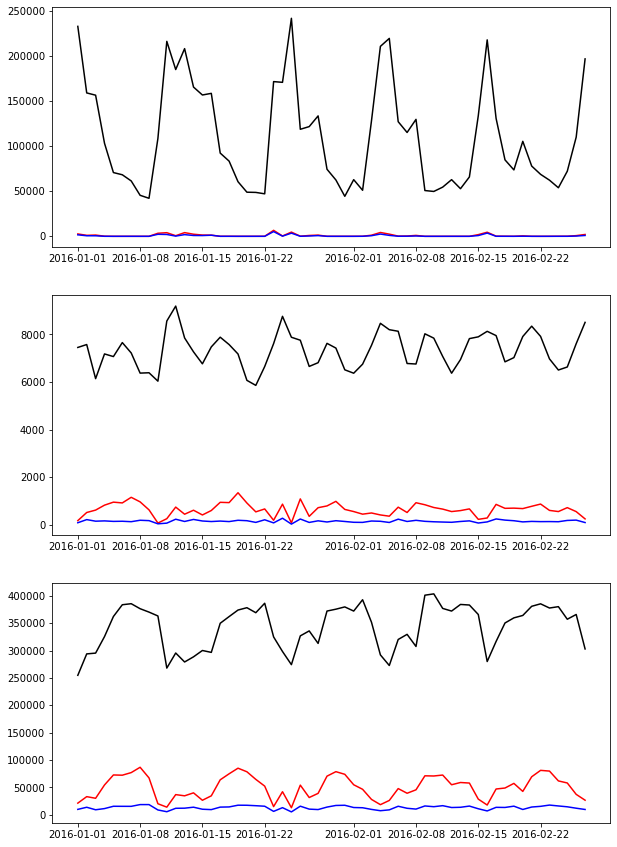

In [8]:
fig, ax = plt.subplots(3,1,figsize=(10,15))

ax[0].plot(dates, freshSOG, 'r')#, ls='dotted')
ax[0].plot(dates, freshOUT, 'k')#, ls='dotted')
ax[0].plot(dates, freshPS, 'b')#, ls='dotted')
# ax[0].set_yscale('log')

ax[1].plot(dates, cucSOG, 'r')
ax[1].plot(dates, cucOUT, 'k')
ax[1].plot(dates, cucPS, 'b')
# ax[1].set_yscale('log')

ax[2].plot(dates, upSOG, 'r')
ax[2].plot(dates, upOUT, 'k')
ax[2].plot(dates, upPS, 'b')
# ax[2].set_yscale('log')